In [1]:
#Importamos la librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import modules from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as arbol

In [2]:
df = pd.read_csv('../../../proyecto-final-datascience/SpotifySongs/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
#Separamos en X e y
X = df.drop("popularity", axis=1) #Elimino de mi dataset la variable a predecir
y = df.popularity #Defino el Target
X.drop(['duration_ms', 'mode', 'time_signature', 'explicit', 'key', 'mode', 'id', 'name', 'artists', 'id_artists', 'release_date'], axis=1, inplace=True)


#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro
#No usar inplace => Crear otra variable con el filtro


In [4]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [5]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [6]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [8]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.11650110953437652
% de aciertos sobre el set de evaluación: 0.11724444444444444


In [9]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[10552     0     0 ...     0     0     0]
 [ 2090     0     0 ...     0     0     0]
 [ 1411     0     0 ...     0     0     0]
 ...
 [    1     0     0 ...     0     0     0]
 [    2     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]]


/home/matias.souto/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


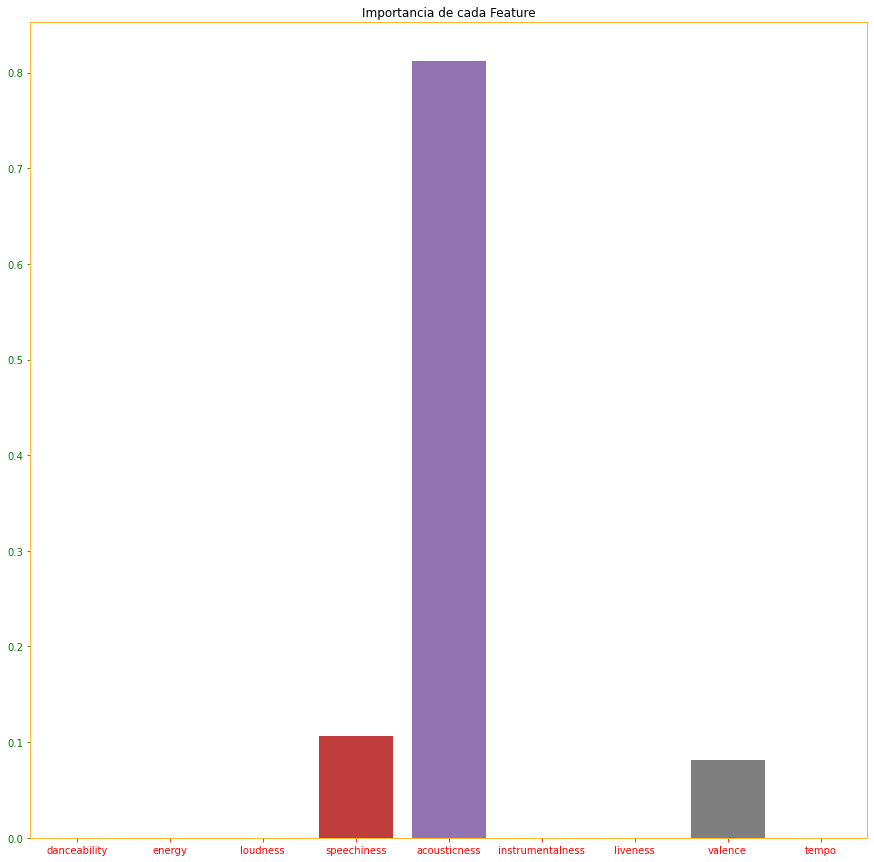

In [10]:
#Importancia de las variables
import matplotlib.pyplot as plt
import seaborn as sns

with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
    plt.figure(figsize=(15,15))
    importances = tree.feature_importances_
    columns = X.columns
    sns.barplot(columns, importances)
    plt.title('Importancia de cada Feature')
    plt.show()

7% de acierto porque mi target tiene muchas posibles soluciones, de 0 a 100. Vamos a categorizarlo

In [11]:
def categorize(row):
    if row['popularity'] < 30:
        val = "low"
    elif row['popularity'] < 70:
        val = "medium"
    else:
        val = "high"
    return val

df['popularityCategorical'] = df.apply(categorize, axis=1)
df.drop(['popularity'], axis=1, inplace=True)

In [12]:
#Separamos en X e y
X2 = df.drop("popularityCategorical", axis=1) #Elimino de mi dataset la variable a predecir
y2 = df.popularityCategorical #Defino el Target
X2.drop(['duration_ms', 'mode', 'time_signature', 'explicit', 'key', 'mode', 'id', 'name', 'artists', 'id_artists', 'release_date'], axis=1, inplace=True)

In [13]:
X2.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851
1,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009
2,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418
3,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980
4,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220


In [14]:
y2.head()

0    low
1    low
2    low
3    low
4    low
Name: popularityCategorical, dtype: object

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=42)
tree2 = DecisionTreeClassifier(max_depth=2, random_state = 42)
tree2.fit(X_train2,y_train2)
y_train_pred2 = tree2.predict(X_train2)
y_test_pred2 = tree2.predict(X_test2)
train_accuracy2 = accuracy_score(y_train2, y_train_pred2)
test_accuracy2 = accuracy_score(y_test2, y_test_pred2)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy2)
print('% de aciertos sobre el set de evaluación:',test_accuracy2)

% de aciertos sobre el set de entrenamiento: 0.6283250316669683
% de aciertos sobre el set de evaluación: 0.6286444444444445


Aumentamos de 7% a 65% reduciendo a 3 posibles outputs: Low, medium, high

In [16]:
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y_test2, y_test_pred2)
print('Matriz de Confusión:')
print(matriz2)

Matriz de Confusión:
[[    0   135  1798]
 [    0 22759 24905]
 [    0  6584 33819]]


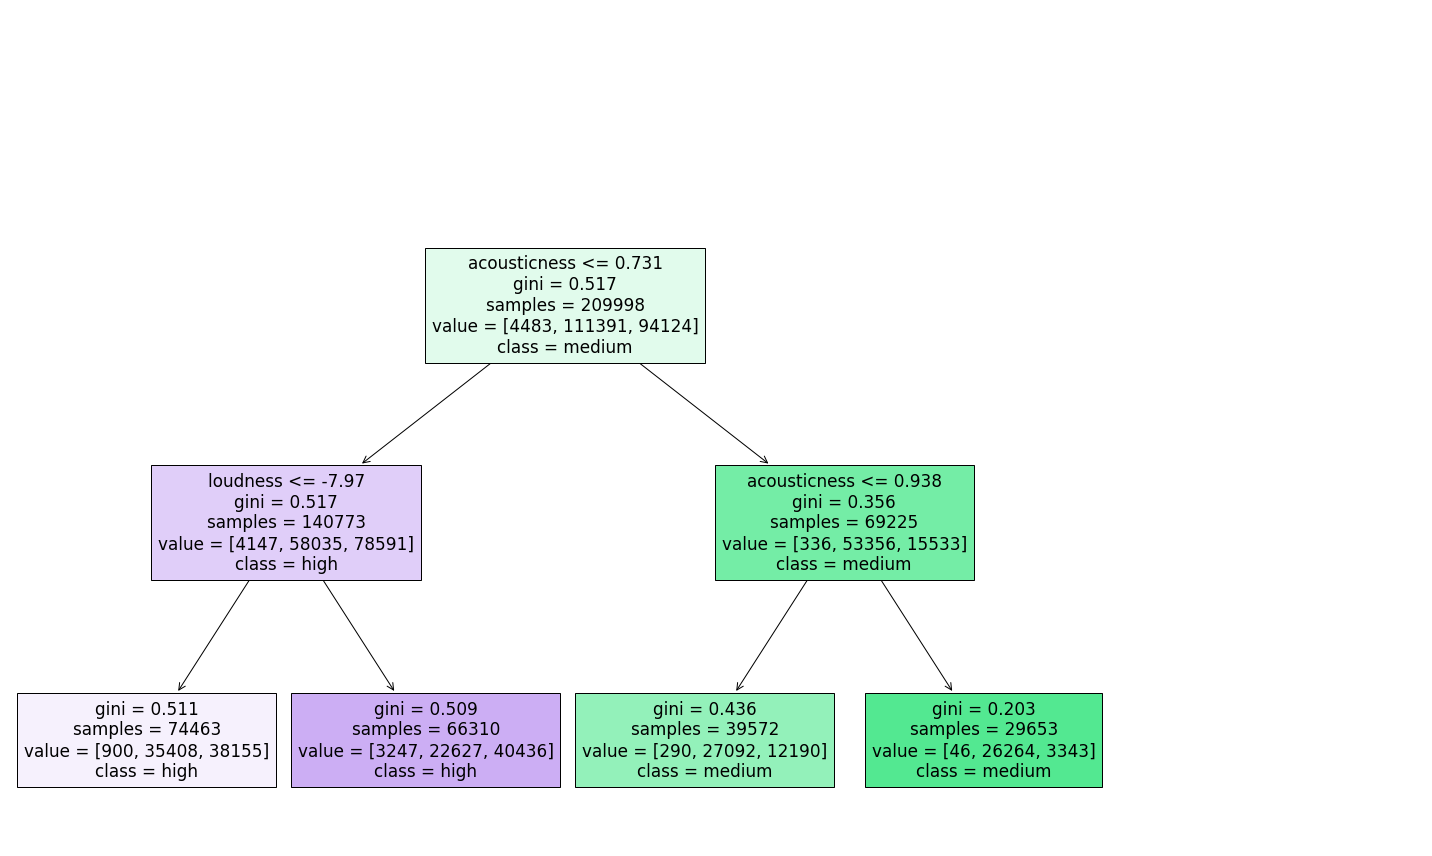

In [17]:
plt.figure(figsize=(20,12))
arbol.plot_tree(tree2, feature_names= X_train2.columns, max_depth=5, class_names=['low', 'medium', 'high'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [18]:
print(arbol.export_text(tree2, feature_names = X_train2.columns.tolist()))

|--- acousticness <= 0.73
|   |--- loudness <= -7.97
|   |   |--- class: medium
|   |--- loudness >  -7.97
|   |   |--- class: medium
|--- acousticness >  0.73
|   |--- acousticness <= 0.94
|   |   |--- class: low
|   |--- acousticness >  0.94
|   |   |--- class: low



Vamos a reducir una cardinalidad más popularity para ver como evoluciona el % de aciertos y demás

In [19]:
def categorizeMore(row):
    if row['popularityCategorical'] == "low" or row['popularityCategorical'] == "medium":
        val = "low"
    else:
        val = "high"
    return val

df['popularityCategoricalMore'] = df.apply(categorizeMore, axis=1)
df.drop(['popularityCategorical'], axis=1, inplace=True)

#Separamos en X e y
X3 = df.drop("popularityCategoricalMore", axis=1) #Elimino de mi dataset la variable a predecir
y3 = df.popularityCategoricalMore #Defino el Target
X3.drop(['duration_ms', 'mode', 'time_signature', 'explicit', 'key', 'mode', 'id', 'name', 'artists', 'id_artists', 'release_date'], axis=1, inplace=True)

In [20]:
X3.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851
1,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009
2,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418
3,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980
4,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220


In [21]:
y3.head()

0    low
1    low
2    low
3    low
4    low
Name: popularityCategoricalMore, dtype: object

In [22]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=42)
tree3 = DecisionTreeClassifier(max_depth=2, random_state = 42)
tree3.fit(X_train3,y_train3)
y_train_pred3 = tree3.predict(X_train3)
y_test_pred3 = tree3.predict(X_test3)
train_accuracy3 = accuracy_score(y_train3, y_train_pred3)
test_accuracy3 = accuracy_score(y_test3, y_test_pred3)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy3)
print('% de aciertos sobre el set de evaluación:',test_accuracy3)

% de aciertos sobre el set de entrenamiento: 0.9786521776397871
% de aciertos sobre el set de evaluación: 0.9785222222222222


Subimos a un 99% casi

In [23]:
matriz3 = confusion_matrix(y_test3, y_test_pred3)
print('Matriz de Confusión:')
print(matriz3)

Matriz de Confusión:
[[    0  1933]
 [    0 88067]]


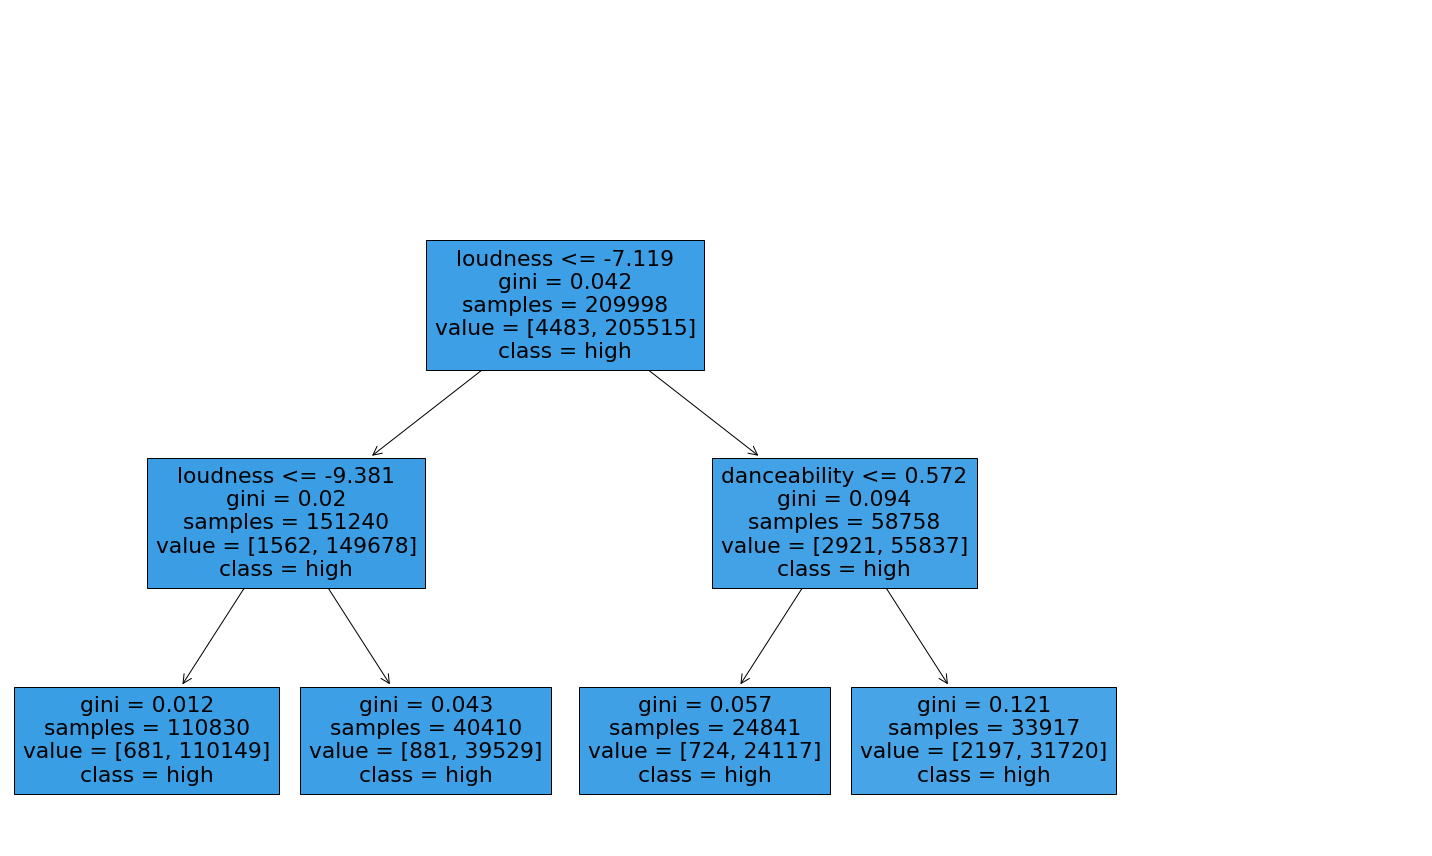

In [24]:
plt.figure(figsize=(20,12))
arbol.plot_tree(tree3, feature_names= X_train3.columns, max_depth=5, class_names=['low', 'high'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [25]:
print(arbol.export_text(tree3, feature_names = X_train3.columns.tolist()))

|--- loudness <= -7.12
|   |--- loudness <= -9.38
|   |   |--- class: low
|   |--- loudness >  -9.38
|   |   |--- class: low
|--- loudness >  -7.12
|   |--- danceability <= 0.57
|   |   |--- class: low
|   |--- danceability >  0.57
|   |   |--- class: low



In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#Así crudo te devuelve el r2 que es el coeficiente de determinación. Podes ponerle otras métricas
tree_regressor = DecisionTreeRegressor(max_depth=2, random_state = 42) #Creamos el modelo
tree_regressor.fit(X_train,y_train)

print(tree_regressor.score(X_train,y_train))
print(tree_regressor.score(X_test,y_test))



0.21132926293104004
0.21284542511188165


In [60]:
#es un array numérico
y_train_pred=tree_regressor.predict(X_train)
y_train_test=tree_regressor.predict(X_test)

df_predicho=y_train.to_frame()
df_predicho['prediccion']=y_train_pred
df_predicho.head(10)

,popularity,prediccion
119497,0,8.701102
274738,40,29.412927
74908,7,20.298051
11630,5,20.298051
216747,40,37.131294
73229,51,37.131294
182321,38,37.131294
84602,63,37.131294
253988,17,37.131294
237532,51,37.131294


In [51]:
tree_reg.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
parameters = {
    'max_depth':list(range(2,20,1)), 
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
tree_reg = DecisionTreeRegressor()
clf = GridSearchCV(estimator=tree_reg, param_grid=parameters )
clf.fit(X_train, y_train)


In [57]:
new_model=clf.best_estimator_
new_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=9)

In [58]:
print(new_model.score(X_train,y_train))
print(new_model.score(X_test,y_test))

0.32562146370224665
0.306353340507732


In [62]:
y_pred_new_model= new_model.predict(X_train)
df_predicho['prediccion_new'] = y_pred_new_model
df_predicho
#Verás como esta prediccion parece acercarse más al valor real ;)


,popularity,prediccion,prediccion_new
119497,0,8.701102,3.757835
274738,40,29.412927,30.574770
74908,7,20.298051,22.942428
11630,5,20.298051,16.675944
216747,40,37.131294,41.643877
...,...,...,...
119879,25,37.131294,31.080422
259178,10,37.131294,44.998959
131932,64,37.131294,44.407018
146867,36,29.412927,34.406577
